## Bagging & Boosting

In [ ]:
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier
)

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)
print(X_train.shape)

(105, 4)


## Bagging

In [ ]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)
bag_clf.fit(X_train, y_train)
print("Bagging OOB score:", bag_clf.oob_score_)
print("Bagging accuracy:", accuracy_score(y_test, bag_clf.predict(X_test)))


Bagging OOB score: 0.9428571428571428
Bagging accuracy: 1.0


## Random Forest

Random Forest OOB score: 0.9428571428571428
Random Forest accuracy: 1.0


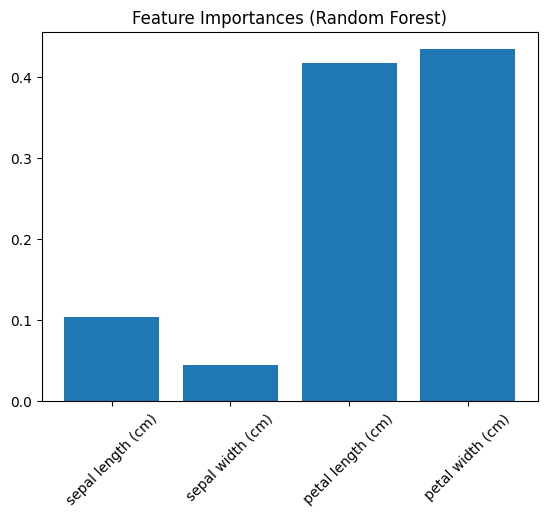

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    oob_score=True,
    n_jobs=-1,
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest OOB score:", rf_clf.oob_score_)
print("Random Forest accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))

importances = rf_clf.feature_importances_
plt.bar(iris.feature_names, importances)
plt.xticks(rotation=45)
plt.title("Feature Importances (Random Forest)")
plt.show()

AdaBoost accuracy: 1.0


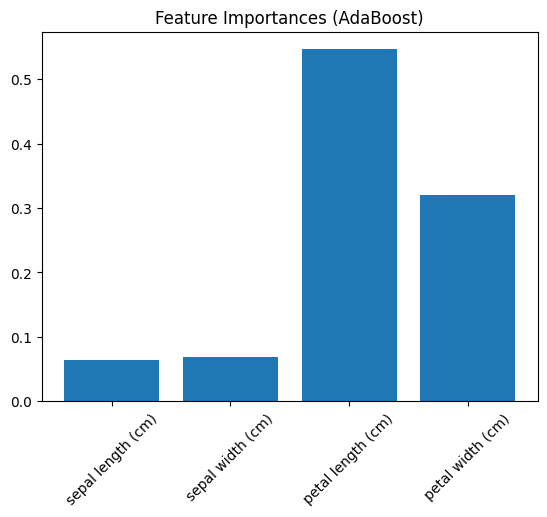

In [ ]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)

ada_clf = AdaBoostClassifier(
    estimator=stump,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

ada_clf.fit(X_train, y_train)

print("AdaBoost accuracy:", accuracy_score(y_test, ada_clf.predict(X_test)))

importances = ada_clf.feature_importances_
plt.bar(iris.feature_names, importances)
plt.xticks(rotation=45)
plt.title("Feature Importances (AdaBoost)")
plt.show()